In [7]:
import os
import math
import random
import warnings
import numpy as np
import pandas as pd 
from sklearn import metrics
from matplotlib import pyplot as plt

warnings.filterwarnings("ignore")

In [8]:
data=pd.read_csv(r"C:\Workplace\Python\AnalysisForThePaper\NEH\second_round\D2O_NEH\res_theo_1.csv")
data.columns=['pep','a','b','cpxt','pxt','neh','cneh','b1','b2','b3','a1','a2','delta1','delta2','rmse',
             'a20','a21','a22','a23']
data=data.drop_duplicates()
print(data.shape)


(286900, 19)


In [9]:
data2=pd.read_csv(r"C:\Workplace\Python\AnalysisForThePaper\NEH\second_round\D2O_NEH\res_theo_2.csv")
data2.columns=['pep','a','b','cpxt','pxt','neh','cneh','b1','b2','b3','a1','a2','delta1','delta2','rmse',
             'a20','a21','a22','a23']
data2=data2.drop_duplicates()
print(data2.shape)


(286900, 19)


In [10]:
pep=list(np.unique(data.pep))
len(pep)

2869

In [5]:
# index=3
# temp1=data[data.pep==pep[0]]
# temp2=data2[data2.pep==pep[0]]
# # temp2=temp1
# print(pep[index],temp1.shape[0],temp2.shape[0])

# plt.figure(figsize=(15,10))
# plt.subplot(2,3,1)
# plt.scatter(temp1.pxt,temp2.cpxt,s=10,c='k')
# plt.subplot(2,3,2)
# plt.scatter(temp1.a,temp2.a,s=10,c='k')
# plt.subplot(2,3,3)
# plt.scatter(temp1.a20,temp2.a20,s=10,c='k')
# plt.subplot(2,3,4)
# plt.scatter(temp1.a21,temp2.a21,s=10,c='k')
# plt.subplot(2,3,5)
# plt.scatter(temp1.a22,temp2.a22,s=10,c='k')
# plt.subplot(2,3,6)
# plt.scatter(temp1.a23,temp2.a23,s=10,c='k')

In [6]:
# index=3
# temp1=data[data.pep==pep[0]]
# temp2=data2[data2.pep==pep[0]]
# # temp2=temp1
# print(pep[index],temp1.shape[0],temp2.shape[0])

# plt.figure(figsize=(15,10))
# plt.subplot(2,3,1)
# plt.scatter(temp1.pxt,temp2.cpxt,s=10,c='k')
# plt.subplot(2,3,2)
# plt.scatter(temp1.a,temp2.a,s=10,c='k')
# plt.subplot(2,3,3)
# plt.scatter(temp1.a20,temp2.a20,s=10,c='k')
# plt.subplot(2,3,4)
# plt.scatter(temp1.a21,temp2.a21,s=10,c='k')
# plt.subplot(2,3,5)
# plt.scatter(temp1.a22,temp2.a22,s=10,c='k')
# plt.subplot(2,3,6)
# plt.scatter(temp1.a23,temp2.a23,s=10,c='k')

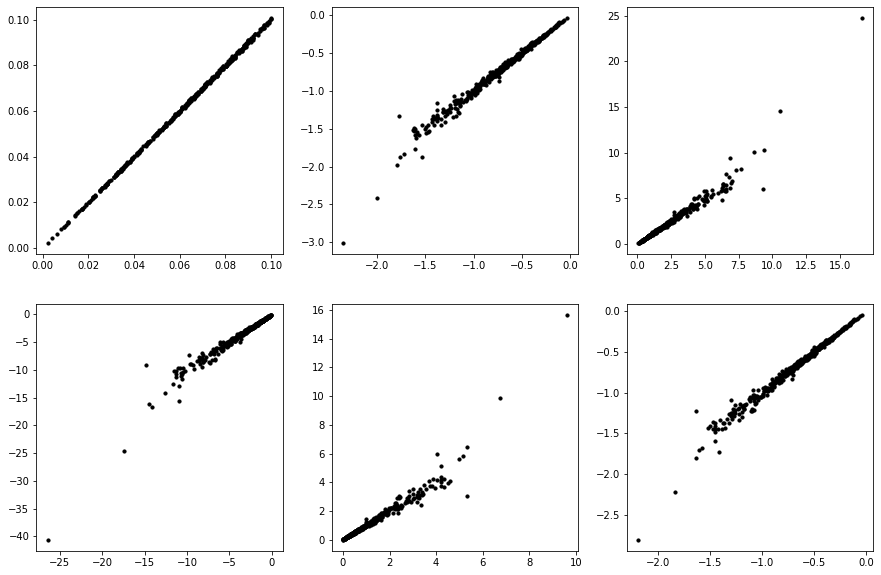

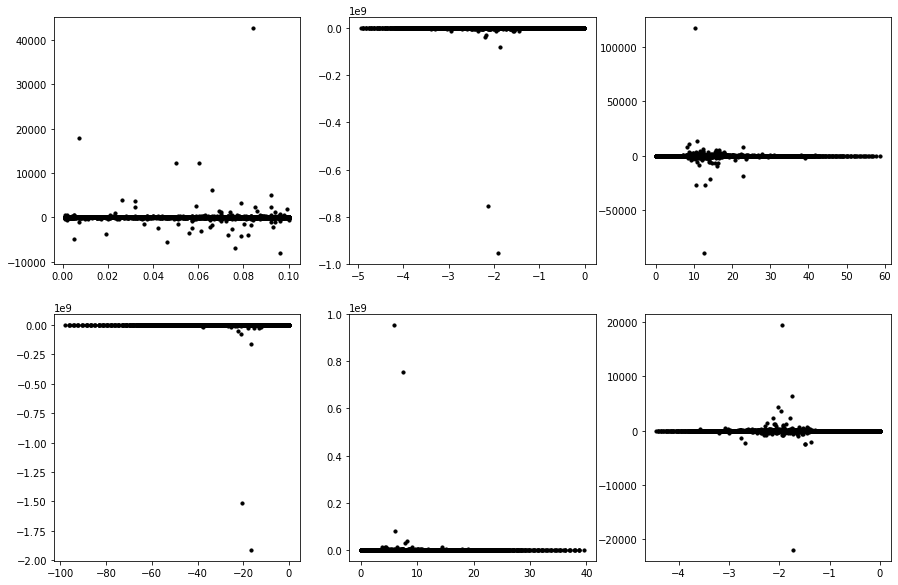

In [21]:
temp_merge=data.merge(data2, on=['pep','pxt'])
temp_merge['pxt_acc']=abs(temp_merge.cpxt_y-temp_merge.pxt)/temp_merge.pxt

temp=temp_merge[temp_merge.pxt_acc<0.01]
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.scatter(temp.pxt,temp.cpxt_y,s=10,c='k')
plt.subplot(2,3,2)
plt.scatter(temp.a_x,temp.a_y,s=10,c='k')
plt.subplot(2,3,3)
plt.scatter(temp.a20_x,temp.a20_y,s=10,c='k')
plt.subplot(2,3,4)
plt.scatter(temp.a21_x,temp.a21_y,s=10,c='k')
plt.subplot(2,3,5)
plt.scatter(temp.a22_x,temp.a22_y,s=10,c='k')
plt.subplot(2,3,6)
plt.scatter(temp.a23_x,temp.a23_y,s=10,c='k')
plt.show()
print('===================================================')

temp=temp_merge[temp_merge.pxt_acc>1]

plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.scatter(temp.pxt,temp.cpxt_y,s=10,c='k')
plt.subplot(2,3,2)
plt.scatter(temp.a_x,temp.a_y,s=10,c='k')
plt.subplot(2,3,3)
plt.scatter(temp.a20_x,temp.a20_y,s=10,c='k')
plt.subplot(2,3,4)
plt.scatter(temp.a21_x,temp.a21_y,s=10,c='k')
plt.subplot(2,3,5)
plt.scatter(temp.a22_x,temp.a22_y,s=10,c='k')
plt.subplot(2,3,6)
plt.scatter(temp.a23_x,temp.a23_y,s=10,c='k')


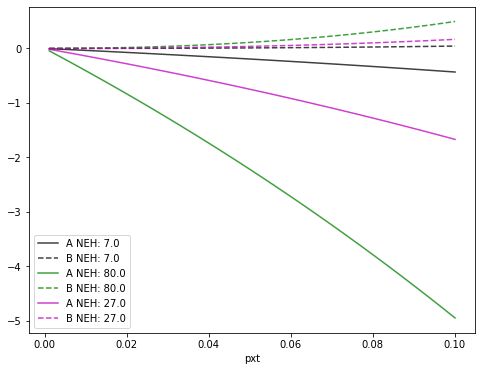

In [281]:
plt.figure(figsize=(8,6))
temp=data[data.pep==data[data.neh == data.neh.min()].pep.unique()[0]]
plt.plot(temp.cpxt.astype('float'),temp.a.astype('float'),alpha=0.75,label="A" +f" NEH: {list(temp.neh.astype('float'))[0]}",c='k' )
plt.plot(temp.cpxt.astype('float'),temp.b.astype('float'),alpha=0.75,label="B" +f" NEH: {list(temp.neh.astype('float'))[0]}",c='k',ls="--" )

temp=data[data.pep==data[data.neh == data.neh.max()].pep.unique()[0]]
plt.plot(temp.cpxt.astype('float'),temp.a.astype('float'),alpha=0.75,label="A" +f" NEH: {list(temp.neh.astype('float'))[0]}",c='g' )
plt.plot(temp.cpxt.astype('float'),temp.b.astype('float'),alpha=0.75,label="B" +f" NEH: {list(temp.neh.astype('float'))[0]}",c='g',ls="--" )

temp=data[data.pep==data[data.neh == data.neh.median()].pep.unique()[0]]
plt.plot(temp.cpxt.astype('float'),temp.a.astype('float'),alpha=0.75,label="A" +f" NEH: {list(temp.neh.astype('float'))[0]}",c='m' )
plt.plot(temp.cpxt.astype('float'),temp.b.astype('float'),alpha=0.75,label="B" +f" NEH: {list(temp.neh.astype('float'))[0]}",c='m',ls="--" )


plt.xlabel('pxt')
# plt.xlim([-5,1])
plt.legend()

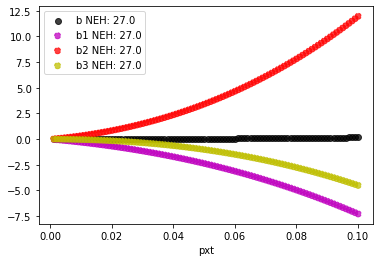

In [282]:
temp=data[data.pep==data[data.neh == data.neh.median()].pep.unique()[0]]
plt.scatter(temp.cpxt.astype('float'),temp.b.astype('float'),alpha=0.75,label="b" +f" NEH: {list(temp.neh.astype('float'))[0]}",c='k' )
plt.scatter(temp.cpxt.astype('float'),temp.b1.astype('float'),alpha=0.75,label="b1" +f" NEH: {list(temp.neh.astype('float'))[0]}",c='m',ls="--" )
plt.scatter(temp.cpxt.astype('float'),temp.b2.astype('float'),alpha=0.75,label="b2" +f" NEH: {list(temp.neh.astype('float'))[0]}",c='r',ls="--" )
plt.scatter(temp.cpxt.astype('float'),temp.b3.astype('float'),alpha=0.75,label="b3" +f" NEH: {list(temp.neh.astype('float'))[0]}",c='y',ls="--" )


plt.xlabel('pxt')
# plt.xlim([-5,1])
plt.legend()

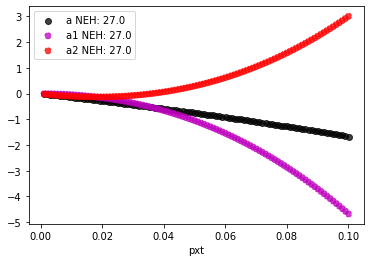

In [283]:

plt.scatter(temp.cpxt.astype('float'),temp.a.astype('float'),alpha=0.75,label="a" +f" NEH: {list(temp.neh.astype('float'))[0]}",c='k' )
plt.scatter(temp.cpxt.astype('float'),temp.a1.astype('float'),alpha=0.75,label="a1" +f" NEH: {list(temp.neh.astype('float'))[0]}",c='m',ls="--" )
plt.scatter(temp.cpxt.astype('float'),temp.a2.astype('float'),alpha=0.75,label="a2" +f" NEH: {list(temp.neh.astype('float'))[0]}",c='r',ls="--" )

plt.xlabel('pxt')
# plt.xlim([-5,1])
plt.legend()

In [284]:
data2=pd.read_csv(r"C:\Workplace\Python\AnalysisForThePaper\NEH\second_round\D2O_NEH\res_theo_2.csv")
data2.columns=['pep','a','b','cpxt','pxt','neh','cneh','b1','b2','b3','a1','a2','delta1','delta2','rmse']
data2.head(15)

,pep,a,b,cpxt,pxt,neh,cneh,b1,b2,b3,a1,a2,delta1,delta2,rmse
0,DSTLIMQLLR,-0.009859,0.008266,0.838491,0.0011,16,2.888154,0.006191,0.002081,-0.000006,-0.008273,-0.001585,0.003181,-0.006191,3.420194e-01
1,DSTLIMQLLR,-0.004579,-0.009987,-2.181053,0.0021,16,13.837552,-0.029366,0.019808,-0.000428,0.009559,-0.014138,0.029129,0.029377,1.562853e+09
2,DSTLIMQLLR,-0.015808,-0.007646,-0.483671,0.0031,16,15.078211,-0.039267,0.032727,-0.001106,0.006540,-0.022348,0.046902,0.039282,1.657401e+03
3,DSTLIMQLLR,-0.035557,0.006918,0.194557,0.0041,16,13.906048,-0.031988,0.040553,-0.001647,-0.008567,-0.026990,0.057267,0.032004,2.908903e-01
4,DSTLIMQLLR,-0.069610,0.023128,0.332250,0.0051,16,18.125470,-0.041672,0.069130,-0.004330,-0.027464,-0.042146,0.092943,0.041697,3.289631e-01
5,DSTLIMQLLR,-0.091813,0.036104,0.393238,0.0061,16,18.143368,-0.042583,0.084904,-0.006216,-0.042329,-0.049484,0.111389,0.042613,3.243860e-01
6,DSTLIMQLLR,-0.053026,0.003343,0.063043,0.0071,16,13.889277,-0.066243,0.074532,-0.004947,-0.008293,-0.044734,0.099350,0.066273,1.658378e-01
7,DSTLIMQLLR,-0.071357,0.000749,0.010491,0.0081,16,17.284906,-0.101099,0.111830,-0.009982,-0.010736,-0.060622,0.141195,0.101144,6.738925e-03
8,DSTLIMQLLR,-0.070212,-0.006313,-0.089919,0.0091,16,16.658039,-0.117602,0.123012,-0.011724,-0.005415,-0.064797,0.153028,0.117651,1.290843e+00
9,DSTLIMQLLR,-0.031700,-0.032623,-1.029133,0.0101,16,12.603749,-0.124605,0.100269,-0.008287,0.024337,-0.056037,0.128637,0.124651,6.246620e+05


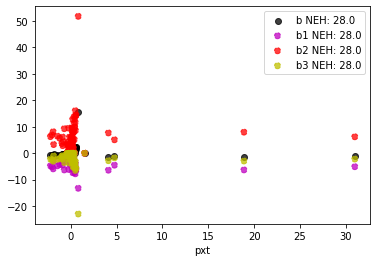

In [285]:
temp2=data2[data2.pep==data2[data2.neh == data2.neh.median()].pep.unique()[0]]
# temp2=temp2[(temp2.cpxt<0.1)&(temp2.cpxt>0)]
plt.scatter(temp2.cpxt.astype('float'),temp2.b.astype('float'),alpha=0.75,label="b" +f" NEH: {list(temp2.neh.astype('float'))[0]}",c='k' )
plt.scatter(temp2.cpxt.astype('float'),temp2.b1.astype('float'),alpha=0.75,label="b1" +f" NEH: {list(temp2.neh.astype('float'))[0]}",c='m',ls="--" )
plt.scatter(temp2.cpxt.astype('float'),temp2.b2.astype('float'),alpha=0.75,label="b2" +f" NEH: {list(temp2.neh.astype('float'))[0]}",c='r',ls="--" )
plt.scatter(temp2.cpxt.astype('float'),temp2.b3.astype('float'),alpha=0.75,label="b3" +f" NEH: {list(temp2.neh.astype('float'))[0]}",c='y',ls="--" )


plt.xlabel('pxt')
# plt.xlim([0,.5])
plt.legend()

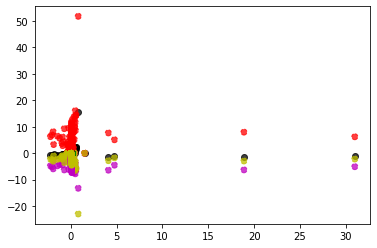

In [286]:

plt.scatter(temp2.cpxt.astype('float'),temp2.b.astype('float'),alpha=0.75,label="b" +f" NEH: {list(temp.neh.astype('float'))[0]}",c='k' )
plt.scatter(temp2.cpxt.astype('float'),temp2.b1.astype('float'),alpha=0.75,label="b1" +f" NEH: {list(temp.neh.astype('float'))[0]}",c='m',ls="--" )
plt.scatter(temp2.cpxt.astype('float'),temp2.b2.astype('float'),alpha=0.75,label="b2" +f" NEH: {list(temp.neh.astype('float'))[0]}",c='r',ls="--" )
plt.scatter(temp2.cpxt.astype('float'),temp2.b3.astype('float'),alpha=0.75,label="b3" +f" NEH: {list(temp.neh.astype('float'))[0]}",c='y',ls="--" )

plt.scatter(temp.cpxt.astype('float'),temp.b.astype('float'),alpha=0.75,label="b" +f" NEH: {list(temp.neh.astype('float'))[0]}",c='g' )
plt.scatter(temp.cpxt.astype('float'),temp.b1.astype('float'),alpha=0.75,label="b1" +f" NEH: {list(temp.neh.astype('float'))[0]}",c='m',ls="--" )
plt.scatter(temp.cpxt.astype('float'),temp.b2.astype('float'),alpha=0.5,label="b2" +f" NEH: {list(temp.neh.astype('float'))[0]}",c='r',ls="--" )
plt.scatter(temp.cpxt.astype('float'),temp.b3.astype('float'),alpha=0.75,label="b3" +f" NEH: {list(temp.neh.astype('float'))[0]}",c='y',ls="--" )


In [287]:
# [x for x in abs((temp2.b2)/(temp2.b1+temp2.b3)) ]

In [288]:
# data2['btest']=[(int)(100*x) for x in abs((data2.b2)/(data2.b1+data2.b3)) ]

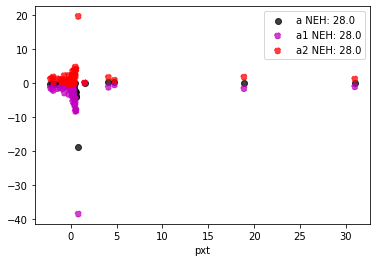

In [289]:
plt.scatter(temp2.cpxt.astype('float'),temp2.a.astype('float'),alpha=0.75,label="a" +f" NEH: {list(temp2.neh.astype('float'))[0]}",c='k' )
plt.scatter(temp2.cpxt.astype('float'),temp2.a1.astype('float'),alpha=0.75,label="a1" +f" NEH: {list(temp2.neh.astype('float'))[0]}",c='m',ls="--" )
plt.scatter(temp2.cpxt.astype('float'),temp2.a2.astype('float'),alpha=0.75,label="a2" +f" NEH: {list(temp2.neh.astype('float'))[0]}",c='r',ls="--" )

plt.xlabel('pxt')
# plt.xlim([-5,1])
plt.legend()

In [290]:
temp.head(5)

,pep,a,b,cpxt,pxt,neh,cneh,b1,b2,b3,a1,a2,delta1,delta2,rmse
3100,VTEGVVDVIVYPSAADK,-0.014890,0.000016,0.0011,0.0011,27,27.0,-0.029596,0.030059,-0.000447,-0.000463,-0.014427,0.029742,0.029610,1.194966e-14
3101,VTEGVVDVIVYPSAADK,-0.028483,0.000060,0.0021,0.0021,27,27.0,-0.057300,0.058982,-0.001623,-0.001683,-0.026799,0.056837,0.057326,1.428393e-14
3102,VTEGVVDVIVYPSAADK,-0.042130,0.000131,0.0031,0.0031,27,27.0,-0.085768,0.089436,-0.003537,-0.003669,-0.038461,0.083986,0.085807,1.009384e-14
3103,VTEGVVDVIVYPSAADK,-0.055833,0.000229,0.0041,0.0041,27,27.0,-0.115005,0.121428,-0.006194,-0.006426,-0.049407,0.111190,0.115057,7.880889e-15
3104,VTEGVVDVIVYPSAADK,-0.069590,0.000355,0.0051,0.0051,27,27.0,-0.145016,0.154969,-0.009598,-0.009958,-0.059633,0.138449,0.145081,1.497382e-14


In [291]:
temp2.head(5)

,pep,a,b,cpxt,pxt,neh,cneh,b1,b2,b3,a1,a2,delta1,delta2,rmse
5200,ISVAGVTSGNVGYLAH,0.009161,-0.013852,1.512010,0.0011,28,8.519199,-0.021934,0.008127,-0.000045,0.013809,-0.004647,0.009384,0.021940,0.321763
5201,ISVAGVTSGNVGYLAH,-0.046746,0.009355,0.200131,0.0021,28,35.517305,-0.057476,0.069636,-0.002804,-0.012163,-0.034583,0.074767,0.057505,0.309867
5202,ISVAGVTSGNVGYLAH,-0.054224,0.003332,0.061450,0.0031,28,32.715800,-0.089007,0.097529,-0.005190,-0.008525,-0.045699,0.101766,0.089048,0.204273
5203,ISVAGVTSGNVGYLAH,-0.093060,0.038921,0.418233,0.0041,28,26.285977,-0.059653,0.104445,-0.005871,-0.044801,-0.048259,0.108250,0.059691,0.314998
5204,ISVAGVTSGNVGYLAH,-0.052504,-0.008191,-0.156004,0.0051,28,23.670025,-0.119511,0.118699,-0.007379,0.000810,-0.053314,0.121374,0.119562,69.579998


In [292]:
0.00001

1e-05

In [293]:
data2.columns

Index(['pep', 'a', 'b', 'cpxt', 'pxt', 'neh', 'cneh', 'b1', 'b2', 'b3', 'a1',
       'a2', 'delta1', 'delta2', 'rmse'],
      dtype='object')

Text(0, 0.5, '100*(pxt- c_pxt)/ pxt')

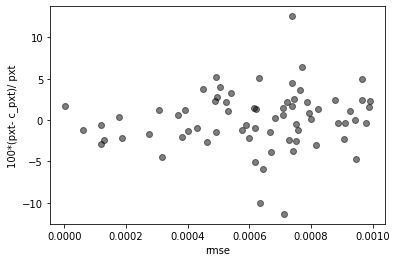

In [321]:
temp3=data2[(data2.rmse < 1e-03)& (data2.b >0)& (data2.a <0) & (data2.cpxt < 0.1)& (data2.cpxt >= 0)][['pep','b','a' , 'cpxt', 'pxt', 'neh', 'cneh', 'delta1', 'delta2', 'rmse']]
# temp3=data[(data.rmse < 1)& (data.b >0)& (data.a <0) & (data.cpxt < 0.1)][['pep','b','a' , 'cpxt', 'pxt', 'neh', 'cneh', 'delta1', 'delta2', 'rmse']]

plt.scatter(temp3.rmse,100*(temp3.pxt-temp3.cpxt)/temp3.pxt,c='k',alpha=0.5)
plt.xlabel('rmse')
plt.ylabel('100*(pxt- c_pxt)/ pxt')
# temp3

In [322]:
# temp3=data2[(data2.rmse < 1)]#& (data2.b >0)& (data2.a <0) & (data2.cpxt < 0.1)][['pep','b','a' , 'cpxt', 'pxt', 'neh', 'cneh', 'delta1', 'delta2', 'rmse']]
# # temp3=data[(data.rmse < 1)]#& (data.b >0)& (data.a <0) & (data.cpxt < 0.1)][['pep','b','a' , 'cpxt', 'pxt', 'neh', 'cneh', 'delta1', 'delta2', 'rmse']]

# plt.scatter(temp3.rmse,100*(temp3.pxt-temp3.cpxt)/temp3.pxt,c='k',alpha=0.5)
# plt.hlines(y=0,xmin=0,xmax=2.5,color='r',ls='-.')
# plt.xlabel('rmse')
# plt.ylabel('100*(pxt- c_pxt)/ pxt')
# # plt.ylim(1000,-100)
# # temp3
# # temp3[temp3.rmse>0.25]

Text(0, 0.5, 'c_pxt')

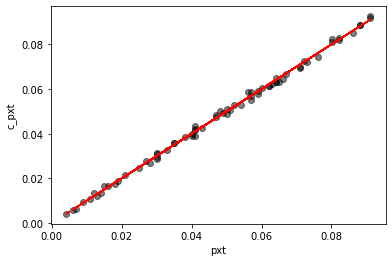

In [323]:
plt.scatter(temp3.pxt,temp3.cpxt,c='k',alpha=0.5)
plt.plot(temp3.pxt,temp3.pxt,c='r',ls="-.")
plt.xlabel("pxt")
plt.ylabel("c_pxt")

<function matplotlib.pyplot.show(close=None, block=None)>

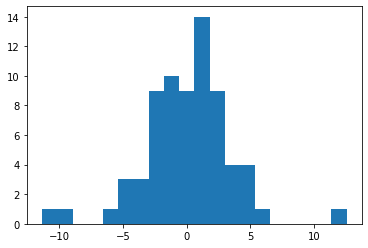

In [324]:
plt.hist(100*(temp3.pxt-temp3.cpxt)/temp3.pxt,bins=20)
plt.show